In [ ]:
# import statements
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


# accessing google with the files 

Mounted at /content/drive


In [ ]:
# read data
df = pd.read_csv('four_seasons_data.csv')


dates_raw = df['Timestamp']
dates_raw.dtype

dates_clean = []
for t in dates_raw:
  dates_clean.append(dt.datetime.strptime(t, "%Y-%m-%d"))

type(dates_clean[0])

df['Timestamp'] = pd.Series(dates_clean)
df.head()

,Timestamp,Email Address,How did you get here?,How much time did it take you since you start walking towards here?,What are you planning to do with the bike during the walk?,What is your level of comfort of parking it here?,Did you do any transfers since you started your journey?,Please describe your experience,Did you drive the car or were you a passenger?,How easy was finding parking?,Do you use these services often?,Have you been right here before?,"If you had to come back, would you choose same way to arrival?",Next time I come here I will,,.1,.2,.3,.4,.5
0,2022-06-07,NaN,Walking,6-15 min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Maybe,J,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-07,NaN,Private Car,NaN,NaN,NaN,NaN,NaN,A friend/family member drop me off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-07,NaN,Transit,NaN,NaN,NaN,Yes,Lon,NaN,NaN,NaN,No,No,G,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-19,NaN,Transit,NaN,NaN,NaN,Yes,Pretty good,NaN,NaN,NaN,No,Yes,Same,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-19,NaN,Walking,6-15 min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,D,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# extract data for Mode of Transportation (how did you get there?)
mode_of_transportation_df = df[['Timestamp', 'How did you get here?']]
mode_of_transportation_df

# check if we have missing values in data
boolean_arr = pd.isna(mode_of_transportation_df['How did you get here?'])
true_values = boolean_arr[boolean_arr == True]
print(len(true_values))

0


In [ ]:
# inspect mode of transportation dataframe
mode_of_transportation_df.head()

,Timestamp,How did you get here?
0,2022-06-07,Walking
1,2022-06-07,Private Car
2,2022-06-07,Transit
3,2022-06-19,Transit
4,2022-06-19,Walking


In [ ]:
# dates_raw = mode_of_transportation_df['Timestamp']
# dates_raw.dtype

# dates_clean = []
# for t in dates_raw:
#   dates_clean.append(dt.datetime.strptime(t, "%Y-%m-%d"))

# type(dates_clean[0])

# mode_of_transportation_df['Timestamp'] = pd.Series(dates_clean)
# mode_of_transportation_df.head()

In [ ]:
def create_mode_of_transportation_plot(dataframe):
  mode_arr = dataframe['How did you get here?']

  walk_arr = mode_arr[mode_arr == 'Walking']
  transit_arr = mode_arr[mode_arr == 'Transit']
  car_arr = mode_arr[mode_arr == 'Private Car']
  
  bar_data = {'Walking': len(walk_arr), 'Transit':len(transit_arr), 
            'Private Vehicle': len(car_arr)}

  print(bar_data)
  x_values = list(bar_data.keys())
  y_values = list(bar_data.values())
  
  # creating the bar plot
  fig = plt.figure(figsize=(8,5), facecolor="white")

  plt.bar(x_values[0], y_values[0], color ='#96c67a',
        width = 0.4, label="Walking")
  plt.bar(x_values[1], y_values[1], color ='#9DCAEB',
        width = 0.4, label="Transit")
  plt.bar(x_values[2], y_values[2], color ='#e88389',
        width = 0.4, label="Private Car")
  
  
  ax = plt.axes()
  ax.set_facecolor("#f3f9ed")
  plt.legend()

  sns.despine(left=False, bottom=False)
  plt.yticks(size=12)
  plt.xticks(size=12)
  plt.figtext(0.5, -0.1, 'Figure 1: Shows modes of transportation choosen by participants to commute to our event sites in 2022',
            wrap=True, horizontalalignment='center', fontsize=12, fontweight=500, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})
  plt.title("Annual Participant Mobility 2022", size=18, pad=14.0, color="black")
  plt.ylabel("Number of Participants", labelpad=8, size=14)
  plt.xlabel("Mode of Transportation", labelpad=10.0, size=14)
  plt.yticks()

  plt.show()

  fig.savefig("drive/My Drive/image_filename.png")





{'Walking': 10, 'Transit': 40, 'Private Vehicle': 11}


<ipython-input-7-7ca546bfba6b>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


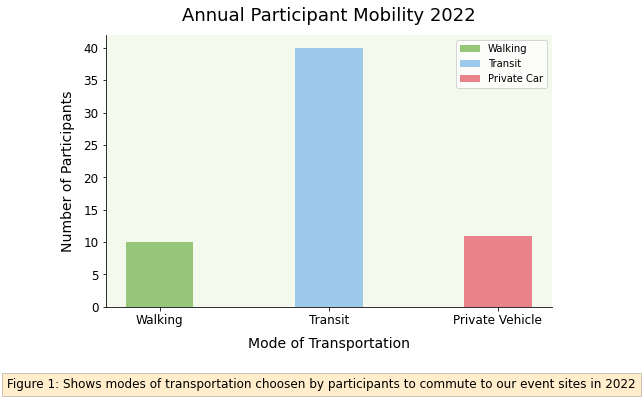

In [ ]:
event =  mode_of_transportation_df[mode_of_transportation_df.Timestamp == dt.datetime(2022,12,17)]

create_mode_of_transportation_plot(mode_of_transportation_df)

In [ ]:
# mode_arr = mode_of_transportation_df['How did you get here?']

# walk_arr = mode_arr[mode_arr == 'Walking']
# transit_arr = mode_arr[mode_arr == 'Transit']
# car_arr = mode_arr[mode_arr == 'Private Car']

# bar_data = {'Walking':len(walk_arr), 'Transit':len(transit_arr), 
#             'Private Vehicle': len(car_arr)}
# courses = list(bar_data.keys())
# values = list(bar_data.values())
  
# # creating the bar plot

# fig = plt.figure(figsize=(8,5), facecolor="white")
# plt.bar(courses, values, color ='#FFB84F',
#         width = 0.4)
# ax = plt.axes()
# ax.set_facecolor("#f3f9ed")
# sns.despine(left=False, bottom=False)
# plt.yticks(size=12)
# plt.xticks(size=12)


# plt.figtext(0.5, -0.1, 'Figure 1: Preffered mode of transportation chosen by participant to commute to  our site',
#             wrap=True, horizontalalignment='center', fontsize=12, fontweight=500, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})
# plt.title("Participant Mobility (2022)", size=22, pad=10.0, color="black")
# plt.ylabel("# of Participants", labelpad=8, size=14)
# plt.xlabel("Mode of Transportation", labelpad=10.0, size=14)

# fig.savefig("drive/My Drive/image_filename.png")

# plt.show()

<ipython-input-15-32245e90049c>:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, -0.15, 'Figure 3: Shows number of participants who had already been to each event site')

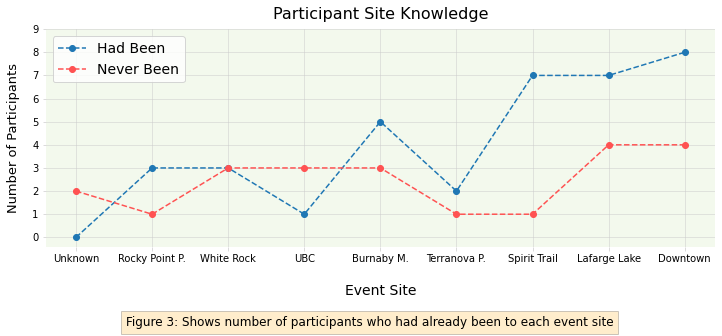

In [ ]:
been_here_df = df[['Timestamp', 'Have you been right here before?']]
been_here_df.head()


june_07 = been_here_df[been_here_df['Timestamp'] == dt.datetime(2022,6,7)]
june_19_rocky_point_park =  been_here_df[been_here_df['Timestamp'] == dt.datetime(2022,6,19)]
june_26_white_rock =  been_here_df[been_here_df['Timestamp'] == dt.datetime(2022,6,26)]

#june 
june_07_yes_count = len(june_07[june_07['Have you been right here before?'] == 'Yes'])
june_07_no_count = len(june_07[june_07['Have you been right here before?'] == 'No'])

june_19_yes_count = len(june_19_rocky_point_park[june_19_rocky_point_park['Have you been right here before?'] == 'Yes'])
june_19_no_count = len(june_19_rocky_point_park[june_19_rocky_point_park['Have you been right here before?'] == 'No'])


june_26_yes_count = len(june_26_white_rock[june_26_white_rock['Have you been right here before?'] == 'Yes'])
june_26_no_count = len(june_26_white_rock[june_26_white_rock['Have you been right here before?'] == 'No'])

# july
july_09_ubc = been_here_df[been_here_df['Timestamp'] == dt.datetime(2022,7,9)]
july_09_yes_count = len(july_09_ubc[july_09_ubc['Have you been right here before?'] == 'Yes'])
july_09_no_count = len(july_09_ubc[july_09_ubc['Have you been right here before?'] == 'No'])

# september
september_24_burnaby_mountain = been_here_df[been_here_df['Timestamp'] == dt.datetime(2022,9,24)]
september_24_yes_count = len(september_24_burnaby_mountain[september_24_burnaby_mountain['Have you been right here before?'] == 'Yes'])
september_24_no_count = len(september_24_burnaby_mountain[september_24_burnaby_mountain['Have you been right here before?'] == 'No'])


# october
october_01_terranova_park = been_here_df[been_here_df['Timestamp'] == dt.datetime(2022,10,1)]
october_01_yes_count = len(october_01_terranova_park[october_01_terranova_park['Have you been right here before?'] == 'Yes'])
october_01_no_count = len(october_01_terranova_park[october_01_terranova_park['Have you been right here before?'] == 'No'])

#december
#DECEMBER 3rd – SPIRIT TRIAL LONSDALE QUAY
dec_03_spirit_trail = been_here_df[been_here_df['Timestamp'] == dt.datetime(2022,12,3)]
dec_03_yes_count = len(dec_03_spirit_trail[dec_03_spirit_trail['Have you been right here before?'] == 'Yes'])
dec_03_no_count = len(dec_03_spirit_trail[dec_03_spirit_trail['Have you been right here before?'] == 'No'])

#DECEMBER 11th – LAFARGE LAKE
dec_11_lake = been_here_df[been_here_df['Timestamp'] == dt.datetime(2022,12,11)]
dec_11_yes_count = len(dec_11_lake[dec_11_lake['Have you been right here before?'] == 'Yes'])
dec_11_no_count = len(dec_11_lake[dec_11_lake['Have you been right here before?'] == 'No'])
#DECEMBER 17TH – DOWNTOWN VANCOUVER
dec_17_dt = been_here_df[been_here_df['Timestamp'] == dt.datetime(2022,12,17)]
dec_17_yes_count = len(dec_17_dt[dec_17_dt['Have you been right here before?'] == 'Yes'])
dec_17_no_count = len(dec_17_dt[dec_17_dt['Have you been right here before?'] == 'No'])

y_axis_yes = [june_07_yes_count, june_19_yes_count, june_26_yes_count, july_09_yes_count,
              september_24_yes_count, october_01_yes_count, dec_03_yes_count, dec_11_yes_count, dec_17_yes_count]
y_axis_no = [june_07_no_count, june_19_no_count, june_26_no_count, july_09_no_count,
             september_24_no_count, october_01_no_count, dec_03_no_count, dec_11_no_count, dec_17_no_count]
locations = ['Unknown', 'Rocky Point P.', 'White Rock', 'UBC', 'Burnaby M.',
             'Terranova P.', 'Spirit Trail', 'Lafarge Lake', 'Downtown']



fig = plt.figure(figsize=(12,4), facecolor="white")
plt.plot(locations, y_axis_yes, label="Had Been",  marker='o', linestyle='dashed')
plt.plot(locations,y_axis_no, color='#ff5252', label="Never Been", marker='o', linestyle='dashed')
plt.yticks(np.arange(0,10,1))
plt.xticks()

ax = plt.axes()
#f3f9ed
ax.set_facecolor("#f3f9ed")
plt.legend(fontsize=14)

sns.despine(left=True, bottom=True)
plt.title("Participant Site Knowledge", size=16, pad=10.0, color="black")
plt.ylabel("Number of Participants", labelpad=12, size=13)
plt.xlabel("Event Site", labelpad=20.0, size=14)

plt.grid(linewidth=0.5, color="#cccccc")
plt.tick_params(color="lightgrey")

plt.figtext(0.5, -.15, 'Figure 3: Shows number of participants who had already been to each event site',
            wrap=True, horizontalalignment='center', fontsize=12, fontweight=500, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})



Text(0.5, -0.05, 'Figure 3: Shows number of participants who had already been to each event site')

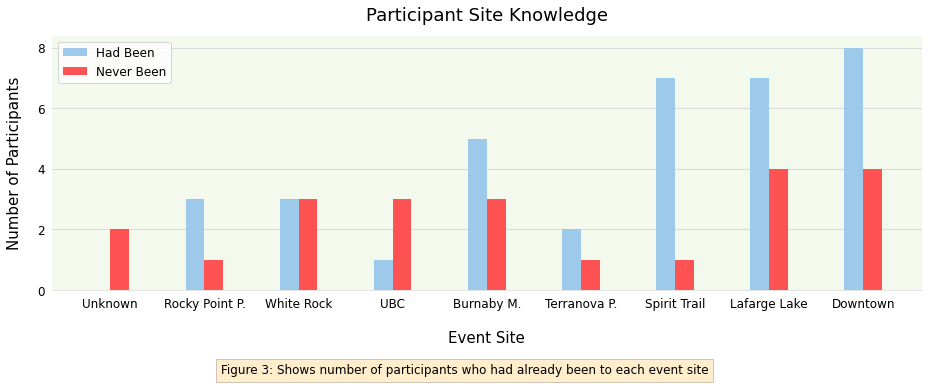

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))
x = np.arange(0, 27, 3)
bar_width = 0.6
b1 = ax.bar(x, y_axis_yes,
            width=bar_width, label='Had Been', color='#9DCAEB')

b2 = ax.bar(x + bar_width, y_axis_no,
            width=bar_width, label='Never Been', color='#ff5252')


# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(locations, fontsize=12)
ax.set_yticks(np.arange(0,10, 2))
ax.set_yticklabels(np.arange(0,10, 2),fontsize=12)

# Add legend.
ax.legend(fontsize=12)

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lightgrey')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Event Site', labelpad=20, fontsize=15)
ax.set_ylabel("Number of Participants", labelpad=15, fontsize=15)
ax.set_title('Participant Site Knowledge', pad=15, fontsize=18)

# face color
ax.set_facecolor("#f3f9ed")


fig.tight_layout()


plt.figtext(0.5, -.05, 'Figure 3: Shows number of participants who had already been to each event site',
            wrap=True, horizontalalignment='center', fontsize=12, fontweight=500, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

1


Text(0.5, -0.13, 'Figure 3: Shows number of participants who would choose same commute route to each event site if they were to return')

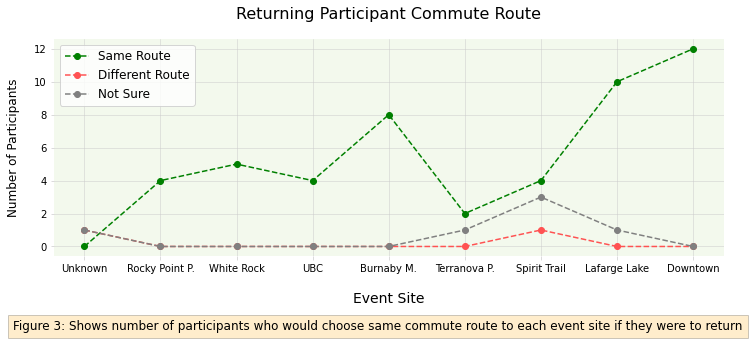

In [ ]:
come_back = df[['Timestamp', 'If you had to come back, would you choose same way to arrival?']]
come_back.head()

#june07
june_07 = come_back[come_back['Timestamp'] == dt.datetime(2022,6,7)]
june_07_yes_count = len(june_07[june_07['If you had to come back, would you choose same way to arrival?'] == 'Yes'])
june_07_no_count = len(june_07[june_07['If you had to come back, would you choose same way to arrival?'] == 'No'])
print(june_07_no_count)
june_07_maybe_count = len(june_07[june_07['If you had to come back, would you choose same way to arrival?'] == 'Maybe'])

#june19 rocky point park
june_19 = come_back[come_back['Timestamp'] == dt.datetime(2022,6,19)]
june_19_yes_count = len(june_19[june_19['If you had to come back, would you choose same way to arrival?'] == 'Yes'])
june_19_no_count = len(june_19[june_19['If you had to come back, would you choose same way to arrival?'] == 'No'])
june_19_maybe_count = len(june_19[june_19['If you had to come back, would you choose same way to arrival?'] == 'Maybe'])

#june26 white rock
june_26 = come_back[come_back['Timestamp'] == dt.datetime(2022,6,26)]
june_26_yes_count = len(june_26[june_26['If you had to come back, would you choose same way to arrival?'] == 'Yes'])
june_26_no_count = len(june_26[june_26['If you had to come back, would you choose same way to arrival?'] == 'No'])
june_26_maybe_count = len(june_26[june_26['If you had to come back, would you choose same way to arrival?'] == 'Maybe'])

#july9 UBC
july_09 = come_back[come_back['Timestamp'] == dt.datetime(2022,7,9)]
july_09_yes_count = len(july_09[july_09['If you had to come back, would you choose same way to arrival?'] == 'Yes'])
july_09_no_count = len(july_09[july_09['If you had to come back, would you choose same way to arrival?'] == 'No'])
july_09_maybe_count = len(july_09[july_09['If you had to come back, would you choose same way to arrival?'] == 'Maybe'])


#SEPTEMBER 24 - BURNABY MOUNTAIN
september_24 = come_back[come_back['Timestamp'] == dt.datetime(2022,9,24)]
september_24_yes_count = len(september_24[september_24['If you had to come back, would you choose same way to arrival?'] == 'Yes'])
september_24_no_count = len(september_24[september_24['If you had to come back, would you choose same way to arrival?'] == 'No'])
september_24_maybe_count = len(september_24[september_24['If you had to come back, would you choose same way to arrival?'] == 'Maybe'])

#OCTOBER 1 - TERRANOVA PARK
oct_01 = come_back[come_back['Timestamp'] == dt.datetime(2022,10,1)]
oct_01_yes_count = len(oct_01[oct_01['If you had to come back, would you choose same way to arrival?'] == 'Yes'])
oct_01_no_count = len(oct_01[oct_01['If you had to come back, would you choose same way to arrival?'] == 'No'])
oct_01_maybe_count = len(oct_01[oct_01['If you had to come back, would you choose same way to arrival?'] == 'Maybe'])

#DECEMBER 3rd – SPIRIT TRIAL LONSDALE QUAY
dec_3 = come_back[come_back['Timestamp'] == dt.datetime(2022,12,3)]
dec_3_yes_count = len(dec_3[dec_3['If you had to come back, would you choose same way to arrival?'] == 'Yes'])
dec_3_no_count = len(dec_3[dec_3['If you had to come back, would you choose same way to arrival?'] == 'No'])
dec_3_maybe_count = len(dec_3[dec_3['If you had to come back, would you choose same way to arrival?'] == 'Maybe'])

#DECEMBER 11th – LAFARGE LAKE
dec_11 = come_back[come_back['Timestamp'] == dt.datetime(2022,12,11)]
dec_11_yes_count = len(dec_11[dec_11['If you had to come back, would you choose same way to arrival?'] == 'Yes'])
dec_11_no_count = len(dec_11[dec_11['If you had to come back, would you choose same way to arrival?'] == 'No'])
dec_11_maybe_count = len(dec_11[dec_11['If you had to come back, would you choose same way to arrival?'] == 'Maybe'])

#DECEMBER 17TH – DOWNTOWN VANCOUVER
dec_17 = come_back[come_back['Timestamp'] == dt.datetime(2022,12,17)]
dec_17_yes_count = len(dec_17[dec_17['If you had to come back, would you choose same way to arrival?'] == 'Yes'])
dec_17_no_count = len(dec_17[dec_17['If you had to come back, would you choose same way to arrival?'] == 'No'])
dec_17_maybe_count = len(dec_17[dec_17['If you had to come back, would you choose same way to arrival?'] == 'Maybe'])


y_axis_yes = [june_07_yes_count, june_19_yes_count, june_26_yes_count,
              july_09_yes_count, september_24_yes_count, oct_01_yes_count,
              dec_3_yes_count, dec_11_yes_count, dec_17_yes_count]
y_axis_no = [june_07_no_count, june_19_no_count, june_19_no_count,
             july_09_no_count, september_24_no_count, oct_01_no_count,
             dec_3_no_count, dec_11_no_count, dec_17_no_count]
y_axis_maybe = [june_07_maybe_count, june_19_maybe_count, june_19_maybe_count,
                july_09_maybe_count, september_24_maybe_count, oct_01_maybe_count,
                dec_3_maybe_count, dec_11_maybe_count, dec_17_maybe_count]
locations = ['Unknown', 'Rocky Point P.', 'White Rock', 'UBC', 'Burnaby M.',
             'Terranova P.', 'Spirit Trail', 'Lafarge Lake', 'Downtown']



# fig = plt.figure(figsize=(12,6), facecolor="white")
fig, (ax1) = plt.subplots(1, figsize=(12,4))


ax1.plot(locations, y_axis_yes, marker='o', linestyle='dashed', label="Same Route", color='green')
ax1.plot(locations,y_axis_no, marker='o', linestyle='dashed', color='#ff5252', label="Different Route")
ax1.plot(locations, y_axis_maybe, label='Not Sure', marker='o', linestyle='dashed', color='grey')

#plt.yticks(np.arange(0,10,1), size=12)
# plt.xticks(size=12, rotation=25)

# ax = plt.axes()
# #f3f9ed
# ax.set_facecolor("#f3f9ed")
# plt.legend(fontsize=14)

# sns.despine(left=True, bottom=True)

#titles 
ax1.set_title("Returning Participant Commute Route", size=16, pad=20.0, color="black")

#labels
ax1.set_ylabel('Number of Participants', labelpad=14.0, size=12)

ax1.set_xlabel('Event Site', labelpad=18.0, size=14)


#ticks frequency
ax1.set_yticks(np.arange(0, 14, 2))

#tick color
ax1.tick_params(color="lightgrey")

#tick rotation

#grid
ax1.grid(linewidth=0.5, color="#cccccc")

#despine plots
sns.despine(left=True, bottom=True)

#facecolor
ax1.set_facecolor("#f3f9ed")

#legend
ax1.legend(fontsize=12)

#spacing between subplots
plt.subplots_adjust(hspace=0.3)

#figure text
plt.figtext(0.5, -.13, 'Figure 3: Shows number of participants who would choose same commute route to each event site if they were to return',
            wrap=True, horizontalalignment='center', fontsize=12, fontweight=500, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

# plt.figtext(0.5, -.17, 'Figure 3: Number of participants who had already been at the walk site before event',
#             wrap=True, horizontalalignment='center', fontsize=12, fontweight=500, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})



Text(0.5, -0.05, 'Figure 3: Shows number of participants who would choose same commute route to each event site if they were to return')

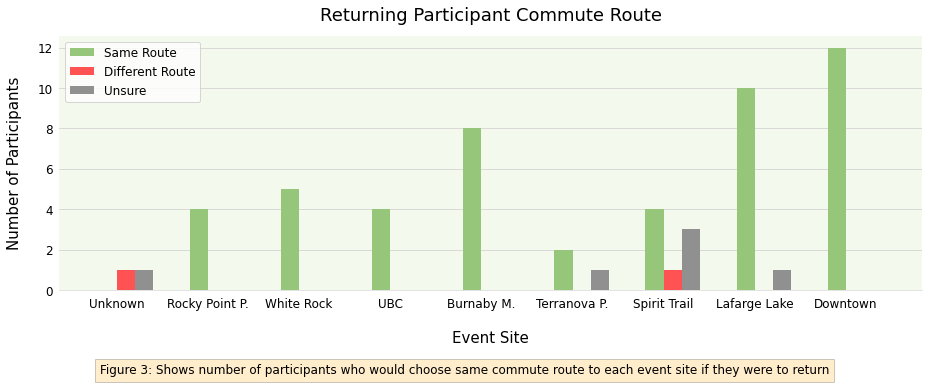

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))
x = np.arange(0, 27, 3)
bar_width = 0.6
b1 = ax.bar(x, y_axis_yes,
            width=bar_width, label='Same Route', color='#96c67a')

b2 = ax.bar(x + bar_width, y_axis_no,
            width=bar_width, label='Different Route', color='#ff5252')

b3 = ax.bar(x + 2*bar_width, y_axis_maybe, width=bar_width, label="Unsure", color='#909090')


# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(locations, fontsize=12)
ax.set_yticks(np.arange(0,14, 2))
ax.set_yticklabels(np.arange(0,14, 2),fontsize=12)

# Add legend.
ax.legend(fontsize=12)

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lightgrey')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Event Site', labelpad=20, fontsize=15)
ax.set_ylabel("Number of Participants", labelpad=15, fontsize=15)
ax.set_title('Returning Participant Commute Route', pad=15, fontsize=18)

# face color
ax.set_facecolor("#f3f9ed")


fig.tight_layout()


plt.figtext(0.5, -.05, 'Figure 3: Shows number of participants who would choose same commute route to each event site if they were to return',
            wrap=True, horizontalalignment='center', fontsize=12, fontweight=500, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

<ipython-input-21-622eb0ad57cf>:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, -0.14, 'Figure 2: Shows mode of transportation chosen by participants to commute to each event site')

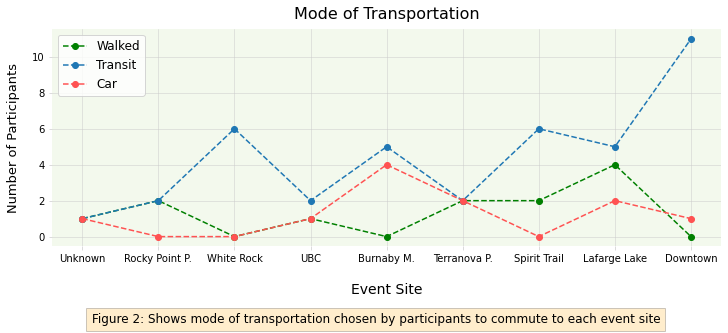

In [ ]:
mode_transportaion = df[['Timestamp', 'How did you get here?']]

june_07 = mode_transportaion[mode_transportaion['Timestamp'] == dt.datetime(2022,6,7)]
june_19_rocky_point_park =  mode_transportaion[mode_transportaion['Timestamp'] == dt.datetime(2022,6,19)]
june_26_white_rock =  mode_transportaion[mode_transportaion['Timestamp'] == dt.datetime(2022,6,26)]

#june 
june_07_walk_count = len(june_07[june_07['How did you get here?'] == 'Walking'])
june_07_transit_count = len(june_07[june_07['How did you get here?'] == 'Transit'])
june_07_car_count = len(june_07[june_07['How did you get here?'] == 'Private Car'])


june_19_walk_count = len(june_19_rocky_point_park[june_19_rocky_point_park['How did you get here?'] == 'Walking'])
june_19_transit_count = len(june_19_rocky_point_park[june_19_rocky_point_park['How did you get here?'] == 'Transit'])
june_19_car_count = len(june_19_rocky_point_park[june_19_rocky_point_park['How did you get here?'] == 'Private Car'])

june_26_walk_count = len(june_26_white_rock[june_26_white_rock['How did you get here?'] == 'Walking'])
june_26_transit_count = len(june_26_white_rock[june_26_white_rock['How did you get here?'] == 'Transit'])
june_26_car_count = len(june_26_white_rock[june_26_white_rock['How did you get here?'] == 'Private Car'])

# # july
july_09_ubc = mode_transportaion[mode_transportaion['Timestamp'] == dt.datetime(2022,7,9)]
july_09_walk_count = len(july_09_ubc[july_09_ubc['How did you get here?'] == 'Walking'])
july_09_transit_count = len(july_09_ubc[july_09_ubc['How did you get here?'] == 'Transit'])
july_09_car_count = len(july_09_ubc[july_09_ubc['How did you get here?'] == 'Private Car'])

# # september
september_24_burnaby_mountain = mode_transportaion[mode_transportaion['Timestamp'] == dt.datetime(2022,9,24)]
sept_walk_count = len(september_24_burnaby_mountain[september_24_burnaby_mountain['How did you get here?'] == 'Walking'])
sept_transit_count = len(september_24_burnaby_mountain[september_24_burnaby_mountain['How did you get here?'] == 'Transit'])
sept_car_count = len(september_24_burnaby_mountain[september_24_burnaby_mountain['How did you get here?'] == 'Private Car'])

# # october
october_01_terranova_park = mode_transportaion[mode_transportaion['Timestamp'] == dt.datetime(2022,10,1)]
oct_walk_count = len(october_01_terranova_park[october_01_terranova_park['How did you get here?'] == 'Walking'])
oct_transit_count = len(october_01_terranova_park[october_01_terranova_park['How did you get here?'] == 'Transit'])
oct_car_count = len(october_01_terranova_park[october_01_terranova_park['How did you get here?'] == 'Private Car'])

#december
# #DECEMBER 3rd – SPIRIT TRIAL LONSDALE QUAY
dec_03_spirit_trail = mode_transportaion[mode_transportaion['Timestamp'] == dt.datetime(2022,12,3)]
dec_03_walk_count = len(dec_03_spirit_trail[dec_03_spirit_trail['How did you get here?'] == 'Walking'])
dec_03_transit_count = len(dec_03_spirit_trail[dec_03_spirit_trail['How did you get here?'] == 'Transit'])
dec_03_car_count = len(dec_03_spirit_trail[dec_03_spirit_trail['How did you get here?'] == 'Private Car'])


# #DECEMBER 11th – LAFARGE LAKE
dec_11_lake = mode_transportaion[mode_transportaion['Timestamp'] == dt.datetime(2022,12,11)]
dec_11_walk_count = len(dec_11_lake[dec_11_lake['How did you get here?'] == 'Walking'])
dec_11_transit_count = len(dec_11_lake[dec_11_lake['How did you get here?'] == 'Transit'])
dec_11_car_count = len(dec_11_lake[dec_11_lake['How did you get here?'] == 'Private Car'])

# #DECEMBER 17TH – DOWNTOWN VANCOUVER
dec_17_dt = mode_transportaion[mode_transportaion['Timestamp'] == dt.datetime(2022,12,17)]
dec_17_walk_count = len(dec_17_dt[dec_17_dt['How did you get here?'] == 'Walking'])
dec_17_transit_count = len(dec_17_dt[dec_17_dt['How did you get here?'] == 'Transit'])
dec_17_car_count = len(dec_17_dt[dec_17_dt['How did you get here?'] == 'Private Car'])

y_axis_yes = [june_07_walk_count, june_19_walk_count, june_26_walk_count, july_09_walk_count,
              sept_walk_count, oct_car_count, dec_03_walk_count, dec_11_walk_count,
              dec_17_walk_count]
y_axis_no = [june_07_transit_count, june_19_transit_count, june_26_transit_count, july_09_transit_count,
             sept_transit_count, oct_car_count, dec_03_transit_count, dec_11_transit_count,
             dec_17_transit_count]
y_axis_car = [june_07_car_count, june_19_car_count, june_26_car_count, july_09_car_count, sept_car_count,
              oct_car_count, dec_03_car_count, dec_11_car_count,
              dec_17_car_count]
locations = ['Unknown', 'Rocky Point P.', 'White Rock', 'UBC', 'Burnaby M.',
             'Terranova P.', 'Spirit Trail', 'Lafarge Lake', 'Downtown']

fig = plt.figure(figsize=(12,4), facecolor="white")
plt.plot(locations, y_axis_yes, label="Walked", color='green',  marker='o', linestyle='dashed')
plt.plot(locations,y_axis_no, label="Transit",  marker='o', linestyle='dashed')
plt.plot(locations,y_axis_car, color='#ff5252', label="Car",  marker='o', linestyle='dashed')

plt.yticks(np.arange(0,12,2))
plt.xticks()

ax = plt.axes()
#f3f9ed
ax.set_facecolor("#f3f9ed")
plt.legend(fontsize=12)

sns.despine(left=True, bottom=True)
plt.title("Mode of Transportation", size=16, pad=10.0, color="black")
plt.ylabel("Number of Participants", labelpad=12, size=13)
plt.xlabel("Event Site", labelpad=19.0, size=14)

plt.grid(linewidth=0.5, color="#cccccc")
plt.tick_params(color="lightgrey")

plt.figtext(0.5, -.14, 'Figure 2: Shows mode of transportation chosen by participants to commute to each event site',
            wrap=True, horizontalalignment='center', fontsize=12, fontweight=500, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})



Text(0.5, -0.05, 'Figure 2: Shows mode of transportation chosen by participants to commute to each event site')

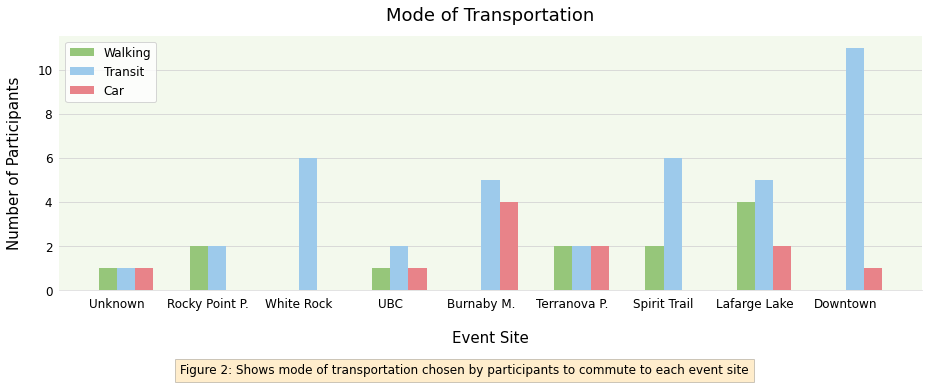

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))
x = np.arange(0, 27, 3)
bar_width = 0.6
b1 = ax.bar(x, y_axis_yes,
            width=bar_width, label='Walking', color='#96c67a')

b2 = ax.bar(x + bar_width, y_axis_no,
            width=bar_width, label='Transit', color='#9DCAEB')

b3 = ax.bar(x + 2*bar_width, y_axis_car, width=bar_width, label="Car", color='#e88389')


  

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(locations, fontsize=12)
ax.set_yticks(np.arange(0,12, 2))
ax.set_yticklabels(np.arange(0,12, 2),fontsize=12)

# Add legend.
ax.legend(fontsize=12)

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lightgrey')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Event Site', labelpad=20, fontsize=15)
ax.set_ylabel("Number of Participants", labelpad=15, fontsize=15)
ax.set_title('Mode of Transportation', pad=15, fontsize=18)

# face color
ax.set_facecolor("#f3f9ed")


fig.tight_layout()


plt.figtext(0.5, -.05, 'Figure 2: Shows mode of transportation chosen by participants to commute to each event site',
            wrap=True, horizontalalignment='center', fontsize=12, fontweight=500, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})
